#### [**Mathematical Modeling of Unsteady Inviscid Flows**](https://www.springer.com/gp/book/9783030183189)
**by Jeff D. Eldredge** (Springer, 2019)

This Jupyter notebook and associated code serve as a companion to the book. The notebook is powered by the [`PotentialFlow`](https://github.com/darwindarak/PotentialFlow.jl) package, written in the [Julia language](https://julialang.org/) by Darwin Darakananda and Jeff D. Eldredge. *The code is released under the [MIT license](https://opensource.org/licenses/MIT).*
<hr />

<!--NAVIGATION-->
< [Potential flows in the plane](3.2-PotentialFlowsInPlane.ipynb) | [Contents](Index.ipynb) | [Next notebook](Header.ipynb) >

<a id='top'></a>
## Corner and wedge flows

In this notebook we will generate flows in which there are a few stagnation streamlines in the form of straight rays emanating from the center. These are called corner (or wedge) flows, and they have a complex potential of the form

$$F(z) = Az^\alpha$$

where $A$ is a complex constant and $\alpha$ a positive real-valued constant. However, it is slightly more informative to write the complex potential in the form given by equation (3.93):

$$F(z) = \nu S L^{1-1/\nu} z^{1/\nu}$$

Here, $L$ is a characteristic length scale of the flow, $S$ is the complex strength of the flow, and $\nu$ is a parameter between $0$ and $2$ that defines the *interior angle* of the corner, given by $\pi \nu$.

#### The usual preparatory steps.

In [1]:
using PotentialFlow
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
nx = 201; ny = 201
xmin = -2; xmax = 2
ymin = -2; ymax = 2
x = range(xmin,xmax,length=nx)
y = range(ymin,ymax,length=ny)

# Output grid of complex coordinates.
Z = [xi + im*yi for xi in x, yi in y]

# Initialize complex potential.
F = zeros(ComplexF64,nx,ny);

We will set $L = 1$ throughout these examples, for simplicity.

In [4]:
L = 1;

#### An example of a right-angled corner

Before we get too far along, let us first set $\nu = 1/2$, which should give an interior angle of $\pi/2$ (90 degrees). We will set the complex strength to $S = 1$.

In [102]:
# strength.
S = 1.0

# factor on interior angle of the corner.
ν = 1/2;

Evaluate the complex potential

In [36]:
F .= ν*S*L^(1-1/ν).*Z.^(1/ν);

and plot the streamlines

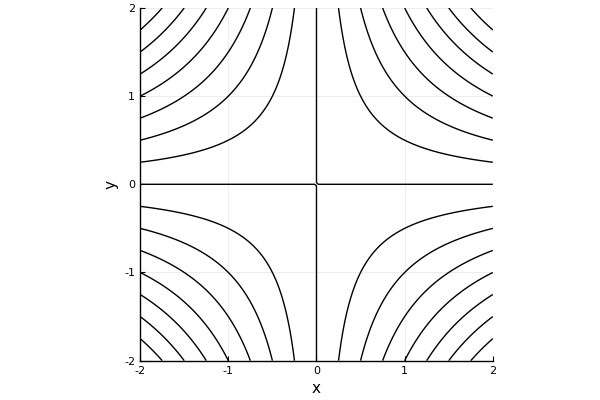

In [37]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

This is indeed a basic corner flow, established between any two of the straight stagnation streamlines that intersect at the center.

To make the plotting a little bit simpler for the remainder of this notebook, let's define a function that will help us:

In [89]:
const mygreen = RGBA{Float64}(151/255,180/255,118/255,1)

function corner(ν,S;radius=2.0,sgn=1.0)
    
    xmin = -radius; xmax = radius
    ymin = -radius; ymax = radius
    
    nx = 201; ny = 201
    x = range(xmin,xmax,length=nx)
    y = range(ymin,ymax,length=ny)

    # Output grid of complex coordinates.
    Z = [xi + im*yi for xi in x, yi in y]

    # Initialize complex potential.
    F = zeros(ComplexF64,nx,ny);

    fact = 1
    θm = -ν*(angle(S)-sgn*π/2)
    L = 1
    
    θ0 = θm - 0.5*fact*π*ν
    θ1 = θm + 0.5*fact*π*ν
    θ = range(θ1-2π,θ0,length=197)
    xv = [0;2*radius*cos.(θ);0]
    yv = [0;2*radius*sin.(θ);0]
    
    F .= ν*S*L^(1-1/ν).*Z.^(1/ν);
    
    ps = contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))
    ps = plot!(xv,yv,fillcolor=mygreen,fillrange=0,linecolor=:black,ratio=1)
    return ps
end

corner (generic function with 2 methods)

Let's use the new function to plot the corner flow again, this time focusing on a specific corner:

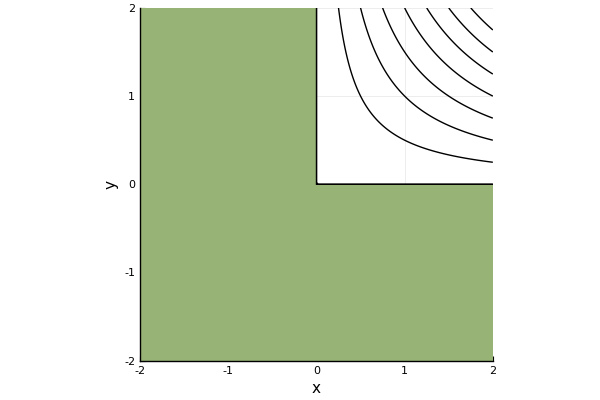

In [105]:
corner(ν,S)

What happens if we make $S$ complex? Let's try that:

In [107]:
# strength.
S = 1.0*exp(-im*π/4)

# factor on interior angle of the corner.
ν = 1/2;

Evaluate the potential again

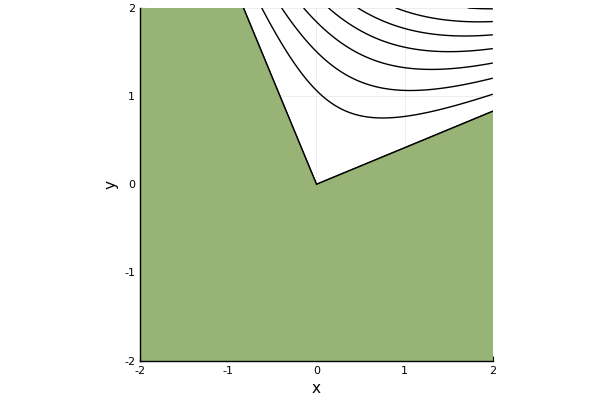

In [108]:
corner(ν,S)

The complex $S$ seems to have rotated the flow, but kept the flow otherwise intact.

##### Setting the orientation of the corner flow

In fact, the complex strength $S$ defines both the magnitude of the corner flow and the orientation of the corner. To prescribe the orientation directly, it is helpful to write $S$ in the form (3.106)

$$S = i \sigma e^{-i \theta_{m}/\nu}$$ 

Here, $\sigma$ is a real-valued constant (called the *signed intensity* (3.103)), and $\theta_m$ is the angle of the bisector of the corner. The sign of $\sigma$ determines the sign of the flow: i.e., a positive corner flow has positive $\sigma$. Now we will set the signed intensity ($\sigma$) and the orientation (via $\theta_m$) separately.

In [109]:
# signed intensity.
σ = 1.0

# interior angle of the corner.
ν = 1/2

# angle of the corner bisector.
θm = π/2;

Carry out the additional calculations to obtain $S$:

In [112]:
n₀ = exp(im*θm) # this is the normal vector of the bisector
S = im*σ*n₀^(-1/ν);

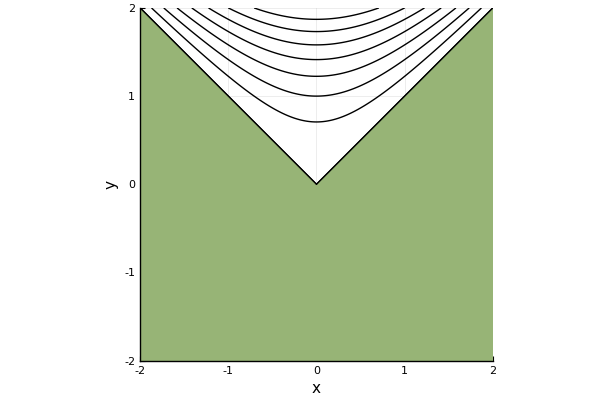

In [113]:
corner(ν,S)

Now, by setting $\theta_m$, we have precise control over the orientation of the corner flow.

##### Multivaluedness and branch cuts

The corner flow with 90-degree corners fits nicely into the plane, since the full angle ($2\pi$) is neatly divisible by the corner angle ($\pi/2$). What if the corner's angle does not fit so nicely? Let's try a case:

In [126]:
# signed intensity.
σ = 1.0

# interior angle of the corner.
ν = 0.6

# angle of the corner bisector.
θm = 3π/4;

Carry out the additional calculations to obtain $S$:

In [127]:
n₀ = exp(im*θm) # this is the normal vector of the bisector
S = im*σ*n₀^(-1/ν);

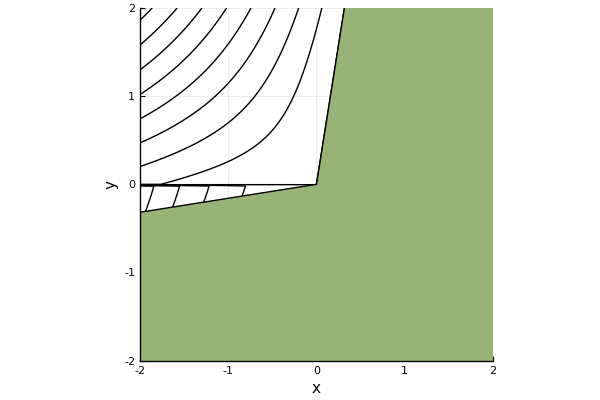

In [128]:
corner(ν,S)

What is happening here? The problem is that the complex potential is multi-valued for most choices of $\nu$. This particular orientation includes the default choice of branch cut inside the corner region. As discussed leading up to equation (3.98), we can move the branch cut so that it is not in the corner. Let's redefine the `corner` function to accommodate the shifted branch cut:

In [129]:
function corner(ν,σ::Real,θm::Real;radius=2.0)
    
    xmin = -radius; xmax = radius
    ymin = -radius; ymax = radius
    
    nx = 201; ny = 201
    x = range(xmin,xmax,length=nx)
    y = range(ymin,ymax,length=ny)

    # Output grid of complex coordinates.
    Z = [xi + im*yi for xi in x, yi in y]

    # Initialize complex potential.
    F = zeros(ComplexF64,nx,ny);

    fact = 1
    L = 1
    
    m = sign(σ) == 1.0 ? 0 : 1
    ϕ = θm/ν-m*π-π/2
    β = θm-π
    n₀ = exp(im*θm) # this is the normal vector of the bisector
    S = im*σ*n₀^(-1/ν)
    
    θ0 = θm - 0.5*fact*π*ν
    θ1 = θm + 0.5*fact*π*ν
    θ = range(θ1-2π,θ0,length=197)
    xv = [0;2*radius*cos.(θ);0]
    yv = [0;2*radius*sin.(θ);0]

    F .= ν*S*L^(1-1/ν).*(Z.*exp(-im*(β+π))).^(1/ν)*exp(im*(β+π)/ν)
    
    ps = contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))
    ps = plot!(xv,yv,fillcolor=mygreen,fillrange=0,linecolor=:black,ratio=1)
    return ps
end

corner (generic function with 3 methods)

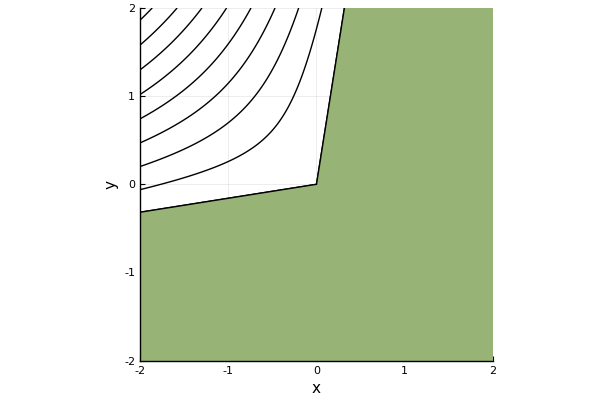

In [130]:
corner(ν,σ,θm)

<!--NAVIGATION-->
< [Potential flows in the plane](3.2-PotentialFlowsInPlane.ipynb) | [Contents](Index.ipynb) | [Next notebook](Header.ipynb) >